<a href="https://colab.research.google.com/github/RVBNN/MODELOS-ESTADISTICOS/blob/main/Ejercicios_Notas_de_Clase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

$\color{red}{\text{Ejercicio 2.}}$
Considere el experimento aleatorio: Lanzamiento de dos dados justos.


Dibuja a la función de distribución acumulada de la variable aleatoria:

$$S:\{1,2,3,4,5,6\}^{2}\to \{2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12 \}$$
dada por
$S(i,j)=i+j.$



In [81]:
# Importamos las librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import product
from fractions import Fraction
from collections import defaultdict
import warnings
warnings.filterwarnings("ignore")

# Definimos el dominio de nuestra variable aleatoria: Conjunto de posibles valores que puede tomar
lanzamiento = [i for i in range(1,7)]
dominio = set(product(lanzamiento, repeat = 2))

# Definimos el espacio muestral: Espacio de todos los posibles resultados del experimento
omega = {(i,j): (i+j) for i,j in dominio}
omega = dict(sorted(omega.items()))

In [82]:
# Agrupamos los elementos que hacen posible al resultado
resultados = defaultdict(set)

for pareja_ordenada, suma_caras in omega.items():
    resultados[suma_caras].add(pareja_ordenada)

resultados

defaultdict(set,
            {2: {(1, 1)},
             3: {(1, 2), (2, 1)},
             4: {(1, 3), (2, 2), (3, 1)},
             5: {(1, 4), (2, 3), (3, 2), (4, 1)},
             6: {(1, 5), (2, 4), (3, 3), (4, 2), (5, 1)},
             7: {(1, 6), (2, 5), (3, 4), (4, 3), (5, 2), (6, 1)},
             8: {(2, 6), (3, 5), (4, 4), (5, 3), (6, 2)},
             9: {(3, 6), (4, 5), (5, 4), (6, 3)},
             10: {(4, 6), (5, 5), (6, 4)},
             11: {(5, 6), (6, 5)},
             12: {(6, 6)}})

In [83]:
# Calculamos su funcion de probabilidad (fdp)
fdp = pd.DataFrame(columns=['suma_caras', 'probabilidad', 'expresion'])

# Utilizando la probabilidad clásica
for key, value in resultados.items():
    probability = len(value)/len(omega)
    fraction = Fraction(len(value), len(omega))

    # Imprimir resultados
    print(f"La probabilidad de que la suma de las caras sea {key} es {fraction} = {np.round(probability, 2)}")

    # Guardamos los resultados en un dataframe
    nueva_fila = pd.DataFrame({
        'suma_caras': [key],
        'probabilidad': [probability],
        'expresion': [fraction]
    })
    fdp = pd.concat([fdp, nueva_fila], ignore_index=True)

La probabilidad de que la suma de las caras sea 2 es 1/36 = 0.03
La probabilidad de que la suma de las caras sea 3 es 1/18 = 0.06
La probabilidad de que la suma de las caras sea 4 es 1/12 = 0.08
La probabilidad de que la suma de las caras sea 5 es 1/9 = 0.11
La probabilidad de que la suma de las caras sea 6 es 5/36 = 0.14
La probabilidad de que la suma de las caras sea 7 es 1/6 = 0.17
La probabilidad de que la suma de las caras sea 8 es 5/36 = 0.14
La probabilidad de que la suma de las caras sea 9 es 1/9 = 0.11
La probabilidad de que la suma de las caras sea 10 es 1/12 = 0.08
La probabilidad de que la suma de las caras sea 11 es 1/18 = 0.06
La probabilidad de que la suma de las caras sea 12 es 1/36 = 0.03


In [84]:
# Agregamos la función de distribución al dataframe
fdp['funcion_distribucion'] = fdp['probabilidad'].cumsum()
fdp

,suma_caras,probabilidad,expresion,funcion_distribucion
0,2,0.027778,1/36,0.027778
1,3,0.055556,1/18,0.083333
2,4,0.083333,1/12,0.166667
3,5,0.111111,1/9,0.277778
4,6,0.138889,5/36,0.416667
5,7,0.166667,1/6,0.583333
6,8,0.138889,5/36,0.722222
7,9,0.111111,1/9,0.833333
8,10,0.083333,1/12,0.916667
9,11,0.055556,1/18,0.972222


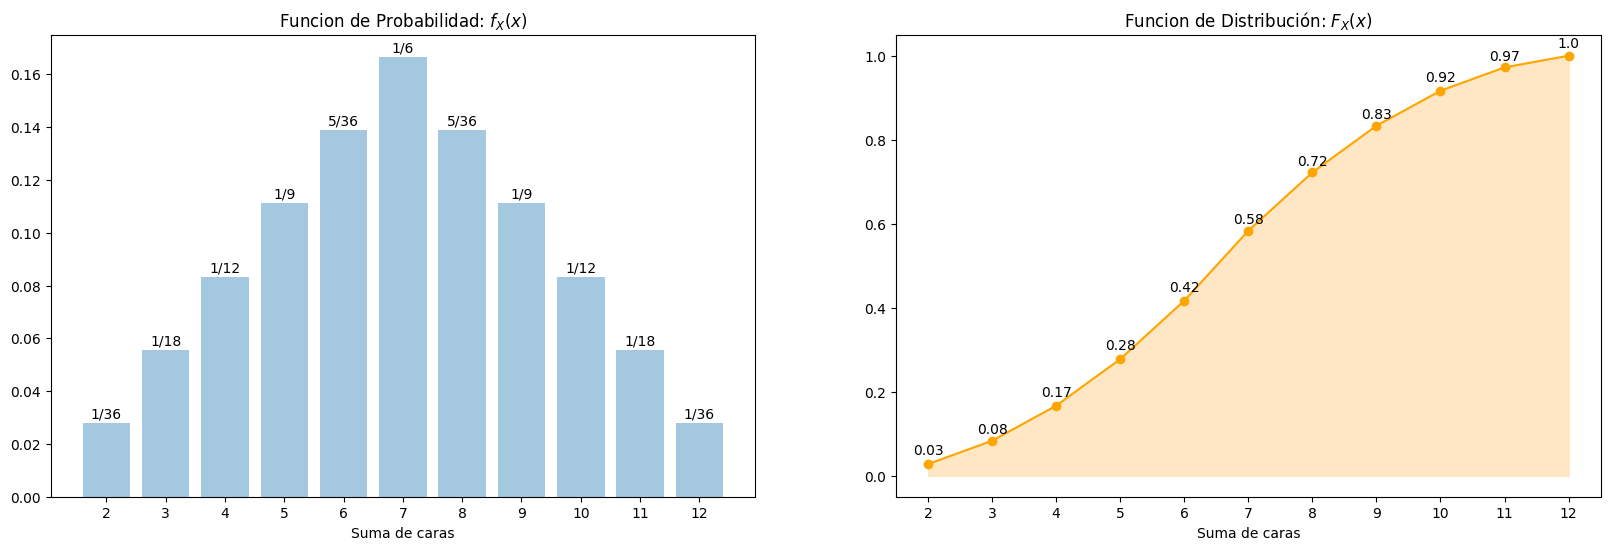

In [92]:
# Funcion para agregar etiquetas de datos
def addlabels(x,y, type):
    if type == 0:
      for i in range(len(x)):
          plt.text(x[i], y[i]+0.002, str(y[i]), ha = 'center')
    elif type == 1:
      for i in range(len(x)):
          ax1.text(x[i], y[i]+0.002, y[i], ha = 'center')
    else:
      for i in range(len(x)):
          ax2.text(x[i], y[i]+0.02, str(y[i]), ha = 'center')

# ---------------------- Lienzo ----------------------
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

# ---------------------- Funcion de probabilidad ----------------------
ax1.bar(fdp['suma_caras'], fdp['probabilidad'], alpha = 0.4)
addlabels(fdp['suma_caras'], fdp['expresion'], 1)

# Valores eje X
x_ticks = np.arange(min(fdp['suma_caras']), max(fdp['suma_caras'])+1, 1)
ax1.set_xticks(x_ticks)

# Etiquetas
ax1.set_title('Funcion de Probabilidad: $f_{X}(x)$')
ax1.set_xlabel('Suma de caras')
ax1.set_label('Probabilidad')
ax1.grid(False)

# ---------------------- Funcion de distribucion ----------------------
ax2.plot(fdp['suma_caras'], fdp['funcion_distribucion'], color = 'orange', marker = "o")
ax2.fill_between(fdp['suma_caras'].astype(float), fdp['funcion_distribucion'].astype(float), color = 'navajowhite', alpha=0.7)
addlabels(fdp['suma_caras'], np.round(fdp['funcion_distribucion'], 2), 2)

# Valores eje X
x_ticks = np.arange(min(fdp['suma_caras']), max(fdp['suma_caras'])+1, 1)
ax2.set_xticks(x_ticks)

# Etiquetas
ax2.set_title('Funcion de Distribución: $F_{X}(x)$')
ax2.set_xlabel('Suma de caras')
ax2.set_label('Probabilidad')
ax2.grid(False)